### Tarea 3


MA5203 - Aprendizaje de Máquinas Probabilístico

Profesor: Felipe Tobar

Autor: Martín Cornejo

## Paquetes necesarios

In [2]:
import numpy as np
import scipy.optimize as opt
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
import pdb

# P1 Regresión logística, clasificación y Metropolis-Hastings

### a)

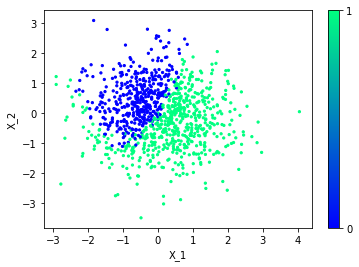

In [4]:
data = np.loadtxt('datosT3_.txt', delimiter=',')
x_input = np.array((data[0], data[1])).T
labels = np.array(data[2])

clase = list(map(lambda x: x == 1, labels))

plt.scatter(x_input[:,0], x_input[:,1], s=5, c=clase, cmap='winter')
#plt.title(u"Conjunto de datos en R² segun su etiqueta")
plt.xlabel(u"X_1")
plt.ylabel(u"X_2")
plt.colorbar(ticks=[0, 1])
plt.savefig('labeled_data.pdf')

In [18]:
epsilon = 0.0000001

def cost_func(theta, x, y):    
    a_param = np.multiply(np.dot(x, theta), -1)
    sigmoid_res = np.reciprocal(np.add(np.exp(a_param), 1))
    
    cross_entropy_res = np.sum(
        np.add(
            np.multiply(
                y,
                np.log(sigmoid_res + epsilon)), 
            np.multiply(
                np.subtract(1, y), 
                np.log(np.subtract(1, sigmoid_res) + epsilon))))/1000    
    
    return cross_entropy_res
    
x_tilda = np.array((data[1], data[0], np.ones(len(labels)))).T
theta_1 = [6132.91882352, -11788.536494  ,  -1586.36667773]
cost_func(theta_1, x_tilda, labels)

opt.minimize(cost_func, theta_1, args=(x_tilda, labels), method='L-BFGS-B', tol=1e-9)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


      fun: -14.635230841847948
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([0., 0., 0.])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 4
      nit: 0
   status: 0
  success: True
        x: array([  6132.91882352, -11788.536494  ,  -1586.36667773])

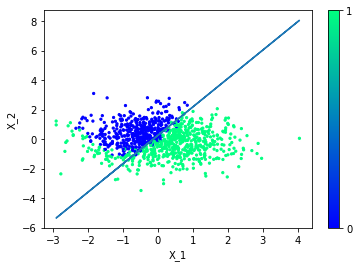

In [21]:
def rectaSepara(x, m2, m1, c):
    return -(m1*x + c)/m2

plt.scatter(x_input[:,0], x_input[:,1], s=5, c=clase, cmap='winter')
plt.plot(x_input[:,0], rectaSepara(x_input[:,0], 6132.91882352, -11788.536494  ,  -1586.36667773))
#plt.title(u"Separando los conjuntos: Regresion logistica")
plt.xlabel(u"X_1")
plt.ylabel(u"X_2")
plt.colorbar(ticks=[0, 1])
plt.savefig('regresion_logistica_1.pdf')

#True

### b)